# Black in X Data Project

In STEM (Science, Technology, Engineering, and Mathematics) fields, the number of Black people is usually small. This is usually especially true for Black people at predominantly white institutions (PWIs) where there is usually a single digit number of Black people. This was true for me as I rarely interacted with other Black people in Physics except at conferences like the National Society of Black Physicists (NSBP) or the Society for Advancement of Chicanos/Hispanics and Native Americans in Science (SACNAS). Having a network and people who understand what you're going through is important for successs in a field. 

#### Goal:  To help increase the network or community of a Black person in STEM.

I developed a recommendation system that will recommend people in STEM to follow based on specific given keywords. For not these include the **Black in Physics**, **Black in Chemistry**, and **Black in Data** weeks. These will be referenced as **Black in X** where **X is physics, chemistry, or data**.



## 1. Import python libraries and dataset, exploratory data analysis (EDA)

In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from rake_nltk import Rake

To gather information about Black people STEM, I scrape twitter for each specific Black in X Roll Calls for each Black in X week and save them as `.json` files. The #BlackinXRollCall was used to by a person who say who they are, what they do, and their interests. 

In [2]:
# Using OS library to call CLI commands in Python
#os.system("snscrape --jsonl --max-results 500 --since 2020-10-25 twitter-search '#BlackInPhysicsRollCall until:2020-10-31' > Black_in_Physics.json")
#os.system("snscrape --jsonl --max-results 500 --since 2020-11-16 twitter-search '#BlackInDataRollCall until:2020-11-21' > Black_in_Data.json")
#os.system("snscrape --jsonl --max-results 500 --since 2020-08-09 twitter-search '#BlackInChemRollCall until:2020-08-15' > Black_in_Chem.json")

In [3]:
BiP_df = pd.read_json('Black_in_Physics.json', lines=True)
BiD_df = pd.read_json('Black_in_Data.json', lines=True) 
BiC_df = pd.read_json('Black_in_Chem.json', lines=True)

Added the research category (physics, chemistry, data) to the dataframes so they are included in the search words. Combine all of the datasets together to make it easier to parse all the information. 

In [4]:
BiP_df['research'] = 'Physics'
BiC_df['research'] = 'Chemistry'
BiD_df['research'] = 'Data'

In [5]:
Blackin_df = pd.concat([BiP_df, BiC_df, BiD_df], ignore_index = True)
content = Blackin_df['content']

In [6]:
Blackin_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,research
0,snscrape.modules.twitter.Tweet,https://twitter.com/ProfTSearles/status/132223...,2020-10-30 18:07:09+00:00,Nothing brings me more joy than working with m...,Nothing brings me more joy than working with m...,1322238628848947204,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,8,33,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[BlackInPhysicsRollCall],NaN,Physics
1,snscrape.modules.twitter.Tweet,https://twitter.com/n3ssa_girl4/status/1322221...,2020-10-30 16:59:13+00:00,My name is Dr. Vanessa A. Sanders and i am #Bl...,My name is Dr. Vanessa A. Sanders and i am #Bl...,1322221533260034048,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,12,46,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[BlackInNuclear, BlackInPhysicsWeek, BlackInPh...",NaN,Physics
2,snscrape.modules.twitter.Tweet,https://twitter.com/ScienceZemen/status/132221...,2020-10-30 16:30:00+00:00,The moment when you are late to #BlackInPhysic...,The moment when you are late to #BlackInPhysic...,1322214177679855616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,9,57,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[BlackInPhysicsWeek, BlackInPhysicsRollCall, B...",NaN,Physics
3,snscrape.modules.twitter.Tweet,https://twitter.com/JoshuaABurrow/status/13221...,2020-10-30 13:38:19+00:00,"I am Joshua Burrow, a Ph.D. cand in Electro-Op...","I am Joshua Burrow, a Ph.D. cand in Electro-Op...",1322170972607229952,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,20,92,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[BlackInPhysicsRollCall, BlackinPhysics]",NaN,Physics
4,snscrape.modules.twitter.Tweet,https://twitter.com/Reneehortonphd/status/1322...,2020-10-30 10:23:00+00:00,I'm checking in for the #BlackInPhysicsRollCal...,I'm checking in for the #BlackInPhysicsRollCal...,1322121821936824320,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,40,147,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","[BlackInPhysicsRollCall, BlackInPhysics]",NaN,Physics


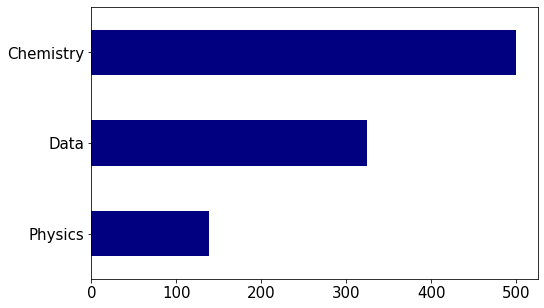

In [7]:
Blackin_df['research'].value_counts()[:].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

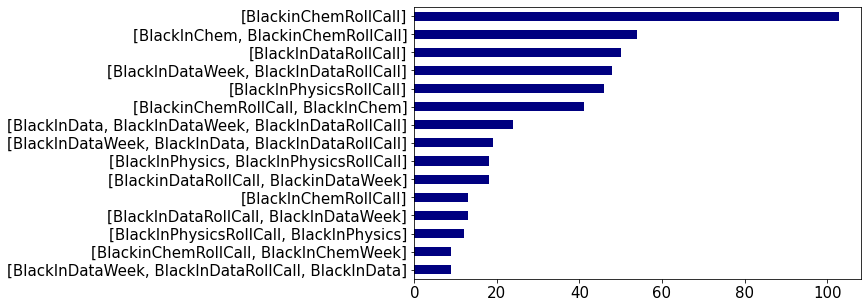

In [8]:
Blackin_df['hashtags'].value_counts()[0:15].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

## 2. Data Pre-processing

First, We want to remove all of the tweets that don't contain introduction words. The tweets that don't contain words from the list of introduction words will most likely not be introduction tweets in the #BlackinXRollCall. The tweets that don't contain introductions are then dropped from the dataset.

We then pre-process the data using NLP to combine all of the attributes for each person into one column. After this we can use Jaccard Similarity to calculate the similarity between our list of keywords and the search_words for each person.

In [9]:
introduction = ["Hey", "Hello", "Hi", "I am", " I\'m ", "name", "check in", "research"]

In [10]:
i = 0
drop_idx = []
for idx in range(len(content)):
    if any(word in content[idx] for word in introduction):
        continue
    else:
        drop_idx.append(idx)

In [11]:
df = Blackin_df.drop(drop_idx, axis=0).reset_index(drop=True)

### Create new colums based on information we want to find

We want to create a list of keywords from the column labeled *content* in the dataframe. The *content* column contains the tweets from #BlackinXRollCall. We also want to use the descriptions and research columns when we build our recommender system. We extract the tweets; user names, display names, and descriptions; and research from the data.

We use the Rapid Automatic Keyword Extraction (RAKE) library to remove all of the stop words, punctuation, whitespace, and convert all of the letters to lowercase.

In [12]:
df['Key_words'] = ''
df['Name'] = ''
df['Description'] = ''
df['username'] = ''

In [13]:
r = Rake()
#save keywords from tweets
for index,row in df.iterrows():
    r.extract_keywords_from_text(row['content'])
    key_words_dict_scores = r.get_ranked_phrases()
    row['Key_words'] = list(key_words_dict_scores)
    df['Key_words'][index] = row['Key_words']
    
    r.extract_keywords_from_text(row['user']['description'])
    key_words_dict_scores = r.get_ranked_phrases()
    row['Description'] = list(key_words_dict_scores)
    df['Description'][index] = row['Description']
    
    r.extract_keywords_from_text(row['research'])
    key_words_dict_scores = r.get_ranked_phrases()
    row['research'] = list(key_words_dict_scores)
    df['research'][index] = row['research']
    
    r.extract_keywords_from_text(row['user']['displayname'])
    key_words_dict_scores = r.get_ranked_phrases()
    row['Name'] = list(key_words_dict_scores)
    df['Name'][index] = row['Name']
    
    r.extract_keywords_from_text(row['user']['username'])
    key_words_dict_scores = r.get_ranked_phrases()
    row['username'] = list(key_words_dict_scores)
    df['username'][index] = row['username']

## 3. Create a column containing search words for each person

Create new column that contains the search words for each person based on the tweets, descriptions, hashtags, and research topics. Create a new dataframe that just contains the descripters for each person (i.e. name, username) and keywords.

In [14]:
df['search_words'] = ''

In [15]:
columns = ['research', 'Key_words', 'Description', 'hashtags']
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['search_words'] = words
    df['search_words'][index] = row['search_words']

In [16]:
new_df = df[['Name', 'username', 'search_words']]
new_df['name_user'] = new_df['Name'] + new_df['username'] 

In [17]:
new_df.head()

,Name,username,search_words,name_user
0,[vanessa sanders ph],[n3ssa_girl4],physics staff scientist medical applications b...,"[vanessa sanders ph, n3ssa_girl4]"
1,[zemen sarah berhe],[sciencezemen],physics blackinphysics https :// standing stro...,"[zemen sarah berhe, sciencezemen]"
2,[joshua burrow],[joshuaaburrow],physics regular ole fella blackinphysics https...,"[joshua burrow, joshuaaburrow]"
3,"[renee horton, phd]",[reneehortonphd],physics black physicist looks like past presid...,"[renee horton, phd, reneehortonphd]"
4,[viktor belay],[belayviktor],physics sloan_kettering studying membrane prot...,"[viktor belay, belayviktor]"


## 4. Calculate the Jaccard Similarity

The Jaccard similarity is a statistic used to gauge the similarity of data sets.

This is measured as the similarity of two finite data sets (A,B) and is defined by the size of the intersection ($| A \cup B|$). The equation for Jaccard similarity is given by

$$ \begin{equation} J(A,B) = \frac{|A\cap B|}{|A| + |B| + |A\cap B|}. \end{equation}$$

These numbers are calculated between $0 \leq J(A,B) \leq 1$.

In [18]:
def get_jaccard_sim(str1, str2):
    a = set(str1) #Create an unordered, unindexed list that does not contain duplicate values from the string
    b = set(str2) 
    c = b.intersection(a) #Calculates the intersection of the two strings
    return(float(len(c)) / (len(a) + len(b) - len(c)))

## 5. Create and test the recommender

We create a recommender that takes the list of given keywords as input and calculates the Jaccard similarity between that list and the search word list for every person. The top *n* hits are returned in **Name**, **username**, order based on the highest calculated similarity.

Regardless of the number of hits that you can give the recommender, it will only return a hit if the calculated Jaccard similarity is greater than 0. If it is 0 it will drop the index and only return the hits that are greater than 0. 

In [19]:
def recommender(keywords, number_of_hits=2, keyword_number=3):
    '''
    keywords: sets the keywords used to search for similar people
    number_of_hits: sets the number of people that the code will return. default = 2
    keyword_number: minimum number of keywords to match for each person. default = 3
    '''

    keywords = keywords.replace(' ','').split(',')
    jaccards = []
    for search in new_df['search_words']:
        matches = {x for x in keywords if x in search}
        if len(matches) >= keyword_number: 
            jaccards.append(get_jaccard_sim(keywords,list(search.split(' '))))
        else:
            jaccards.append(0.0)
    
    jaccards = pd.Series(jaccards)
    j_index = jaccards.nlargest(number_of_hits+1).index
    high_matches = new_df.loc[j_index]
    drop_idx = []
    for i in j_index:
        if jaccards[i] == np.float64(0.00):
            drop_idx.append(i)
    j_index = j_index.drop(drop_idx)
    
    high_matches = new_df.loc[j_index]

    for match,score in zip(zip(high_matches['Name'],high_matches['username']),jaccards[j_index]):
        print(match, score)

We test this for each of the included research categories (chemistry, data, physics). 

### Chemistry

In [20]:
recommender('chemistry, nanoparticles, phd, candidate, nanotech, biological, applications', 5,4)

(['olivia'], ['oliviageneus']) 0.12244897959183673
(['chey jones'], ['cheymjones']) 0.11904761904761904
(['sun kly'], ['sun_kly']) 0.1
(['neuro saweetie ❄️🧠', 'gwenaëlle'], ['getneuro']) 0.1
(['nathalie momplaisir'], ['steministnat']) 0.0975609756097561
(['bruna katiele'], ['brunakatiele1']) 0.07317073170731707


In [21]:
print(new_df['Name'][263],'\n',df['content'][263])

['olivia'] 
 Get in, losers! We’re making nanoparticles 🗣🤪 Hi 👋🏾#BlackInChem #BlackinChemRollCall Olivia here! 4th yr PhD Candidate in Physical Chemistry using nanotechnology for biological applications. I have a B.S in Physics, &amp; Public Health. Excited to meet everyone!

IG: muhammad.oli https://t.co/HILgZl4WHo


### Data

In [22]:
recommender('data, phd, hemoshear, engineering, rare, disease', 5)

(['kris rawls', 'phd'], ['kdrawls']) 0.125
(['dare imam', 'lawal'], ['drdreibile']) 0.09375
(['byron tweets data'], ['byrontweetsdata']) 0.07894736842105263
(['dissertating informaticist', 'kimberly'], ['datakimist']) 0.020833333333333332


In [23]:
print(new_df['Name'][410],'\n',df['content'][410])

['kris rawls', 'phd'] 
 It’s #BlackInDataWeek ! Hi I’m Kris. I have a PhD in Biomedical Engineering and I am a Data Scientist @HemoShear . I use data to understand rare diseases and the effects of different treatments. @BlkInData #BlackInDataRollCall #BlackInData https://t.co/802ptN76X6


### Physics

In [24]:
recommender('physics, eccentric, gravitational, waves, soccer, candidate, eccentricity', 5,4)

(['cheeseboro 🇹🇹🖤🤍💜 🏳️\u200d🌈', 'belinda'], ['bdcheeseboro']) 0.13157894736842105
(['amber lenon', 'dr'], ['amberkiana_']) 0.125


In [25]:
print(new_df['Name'][47],'\n',df['content'][47])

['cheeseboro 🇹🇹🖤🤍💜 🏳️\u200d🌈', 'belinda'] 
 #BlackInPhysicsRollCall 
 Hey y'all!! I'm currently a 6th year PhD candidate in Physics and Astronomy @WestVirginiaU and my research is in eccentric gravitational waves 😁 #BlackInPhysics #BlackinAstro https://t.co/0wfedR1WJV
